In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

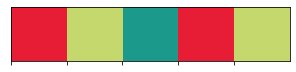

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette(["#e71d36","#c5d86d","#1b998b","#e71d36","#c5d86d"]))
pal=sns.color_palette(["#e71d36","#c5d86d","#1b998b","#e71d36","#c5d86d"])
sns.palplot(["#e71d36","#c5d86d","#1b998b","#e71d36","#c5d86d"])

In [ ]:
df =pd.read_csv('/content/sample_data/telecom_users.csv')

In [ ]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# column Unnamed: 0 & customerID doesn't seems to have valide details. so dropping from the dataframe
df.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


**Column Description**
* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, * No phone service)
* InternetService - client's Internet service provider (DSL, * Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)




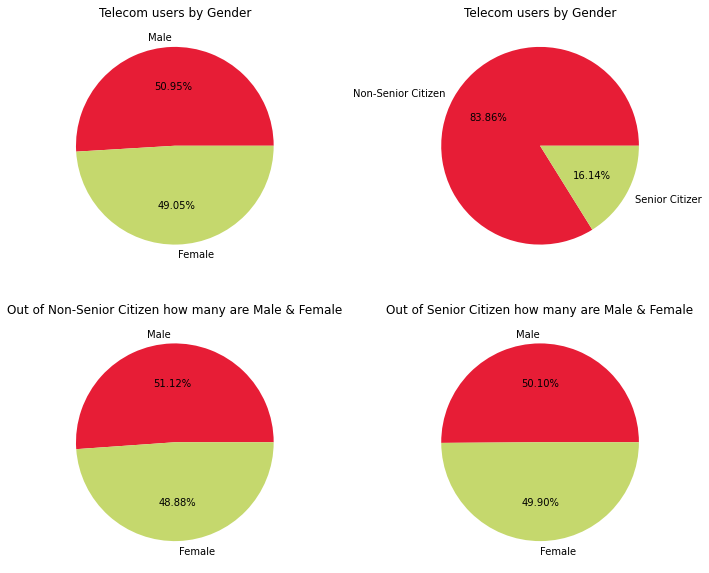

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
colors=["#e71d36","#c5d86d","#1b998b","#e71d36","#c5d86d"]
ax[0,0].pie(df['gender'].value_counts(), autopct='%.2f%%', labels=df['gender'].unique(), colors=colors)
ax[0,0].set_title('Telecom users by Gender')
ax[0,1].pie(df['SeniorCitizen'].value_counts(), autopct='%.2f%%', labels=['Non-Senior Citizen','Senior Citizer'], colors=colors)
ax[0,1].set_title('Telecom users by Gender')
ax[1,1].pie(df[df['SeniorCitizen']==1]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors)
ax[1,1].set_title('Out of Senior Citizen how many are Male & Female')
ax[1,0].pie(df[df['SeniorCitizen']==0]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors)
ax[1,0].set_title('Out of Non-Senior Citizen how many are Male & Female')
plt.show()

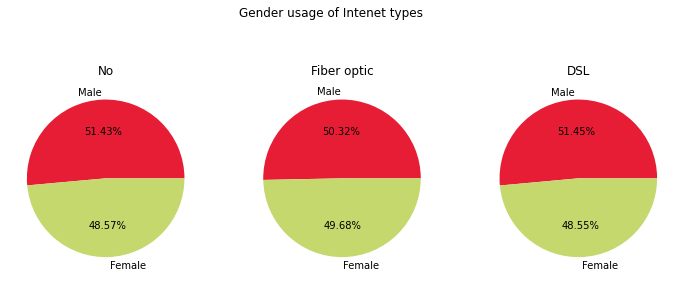

In [ ]:
#ternetService - client's Internet service provider (DSL, Fiber optic, No) -(2,1,0)
fig, ax=plt.subplots(ncols=3,nrows=1, figsize=(12,5))
j=0
fig.suptitle('Gender usage of Intenet types')
for i in df['InternetService'].unique():
    ax[j].pie(df[df['InternetService']==i]['gender'].value_counts(), colors=colors, labels=['Male','Female'], autopct='%.2f%%');
    ax[j].set_title(i)
    j=j+1
#fig.show()

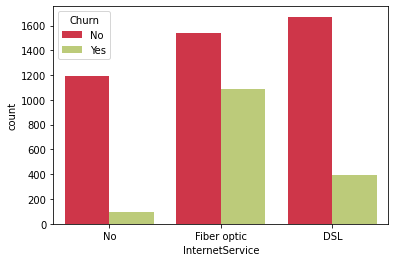

In [ ]:
sns.countplot(x=df['InternetService'], hue=df['Churn'])

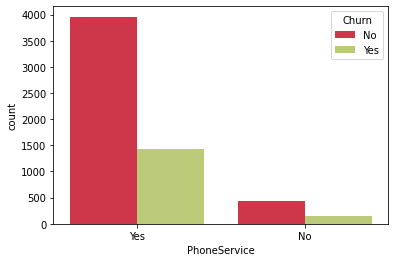

In [ ]:
sns.countplot(x=df['PhoneService'], hue=df['Churn'])

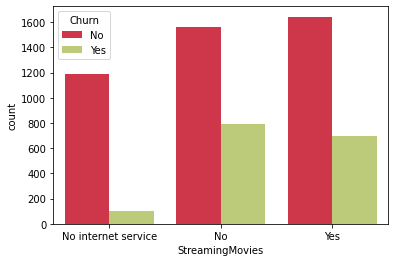

In [ ]:
sns.countplot(x=df['StreamingMovies'], hue=df['Churn'])

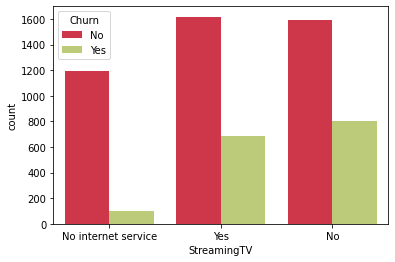

In [ ]:
sns.countplot(x=df['StreamingTV'], hue=df['Churn'])

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(axis=0,inplace=True)

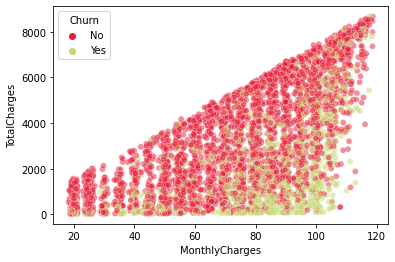

In [ ]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

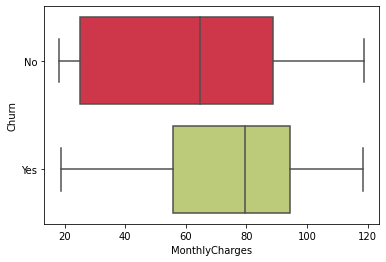

In [ ]:
sns.boxplot(data=df, x='MonthlyCharges', y='Churn')

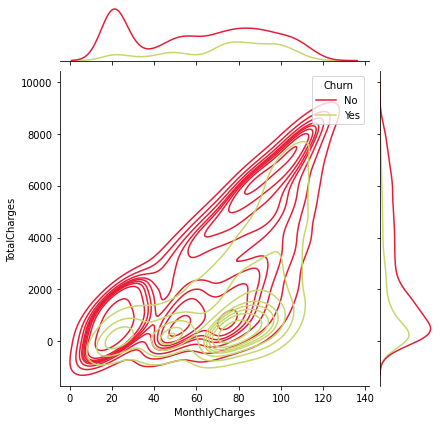

In [ ]:
sns.jointplot(data=df,x='MonthlyCharges',y='TotalCharges', kind='kde', hue='Churn')

**Data Pre-process**
There are lot of Yes/No values, let us replace it with 1 or 0. assumption in bold

* PhoneService - is the telephone service connected (Yes, No) - (1,0)
* MultipleLines - are multiple phone lines connected (Yes, No, * No phone service) - (1,0,0)
* InternetService - client's Internet service provider (DSL, * Fiber optic, No) -(2,1,0)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)-(1,0,0)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)-(1,0,0)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)-(1,0,0)
* TechSupport - is the technical support service connected (Yes, No, No internet service)-(1,0,0)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)-(1,0,0)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)-(1,0,0)
* Contract - type of customer contract (Month-to-month, One year, Two year) - (month-to-month - 1, One Year - 12, Two Year = 24)
* PaperlessBilling - whether the client uses paperless billing (Yes, No) - (1,0)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
Churn - whether there was a churn (Yes or No) - (0,1)

In [ ]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('No internet service',0)
df=df.replace('No phone service',0)
df=df.replace('Fiber optic',2)
df=df.replace('DSL',1)
df=df.replace('Male',1)
df=df.replace('Female',0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   int64  
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   int64  
 3   Dependents        5976 non-null   int64  
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   int64  
 6   MultipleLines     5976 non-null   int64  
 7   InternetService   5976 non-null   int64  
 8   OnlineSecurity    5976 non-null   int64  
 9   OnlineBackup      5976 non-null   int64  
 10  DeviceProtection  5976 non-null   int64  
 11  TechSupport       5976 non-null   int64  
 12  StreamingTV       5976 non-null   int64  
 13  StreamingMovies   5976 non-null   int64  
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   int64  
 16  PaymentMethod     5976 non-null   object 


In [ ]:
# Check for null values
df1=pd.get_dummies(data=df, columns=['Contract','PaymentMethod'], drop_first=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1.columns[abs(df1.corr()['Churn'])>0.1]

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

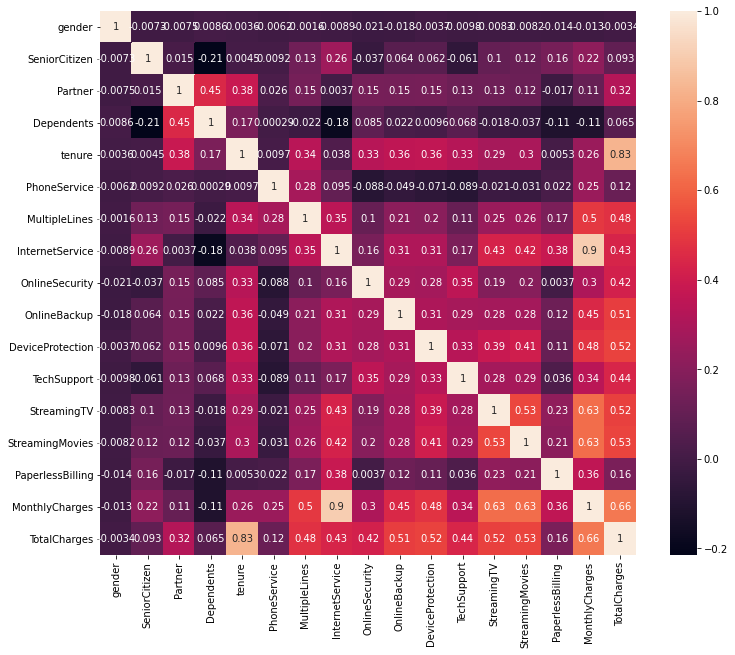

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('Churn',axis=1).corr(), annot=True)

In [ ]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Create Machine Learning Models with Split Method**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, accuracy_score, roc_curve, auc


**Logistic Regression**

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
  
Metrics: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       444
           1       0.79      0.76      0.78       153

    accuracy                           0.89       597
   macro avg       0.86      0.85      0.85       597
weighted avg       0.89      0.89      0.89       597

Accuracy: 
0.8877721943048577
Confusion Matrix: 


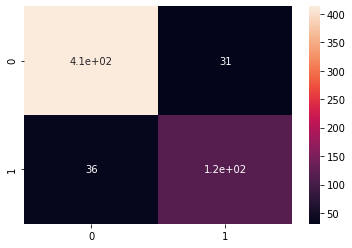

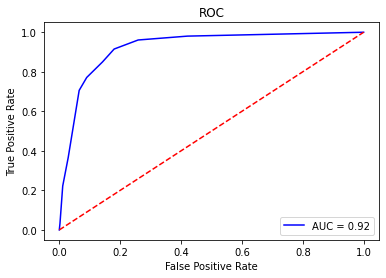

In [ ]:
model_set=[LogisticRegression()]
       
for model in model_set:
    model.fit(X_train,y_train)
    model.score(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print("  ")
    print("Metrics: ")
    print(classification_report(y_test,pred))
    print("Accuracy: ")
    print(accuracy_score(y_test, pred))
    print("Confusion Matrix: ")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True)

plt.figure(figsize=(6,4))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       444
           1       0.72      0.69      0.71       153

    accuracy                           0.85       597
   macro avg       0.81      0.80      0.80       597
weighted avg       0.85      0.85      0.85       597

Accuracy: 
0.8525963149078727
Confusion Matrix: 


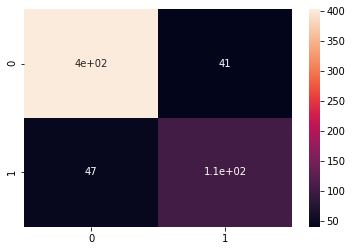

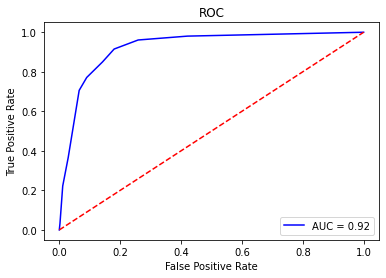

In [ ]:
model_set= [DecisionTreeClassifier()]
for model in model_set:
    model.fit(X_train,y_train)
    model.score(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print("  ")
    print("Metrics: ")
    print(classification_report(y_test,pred))
    print("Accuracy: ")
    print(accuracy_score(y_test, pred))
    print("Confusion Matrix: ")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True)

plt.figure(figsize=(6,4))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**K-Nearest Neighbor**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       444
           1       0.79      0.71      0.74       153

    accuracy                           0.88       597
   macro avg       0.85      0.82      0.83       597
weighted avg       0.87      0.88      0.87       597

Accuracy: 
0.8760469011725294
Confusion Matrix: 


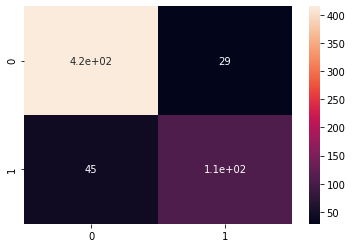

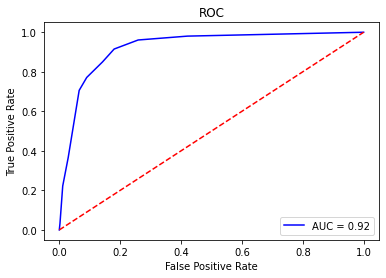

In [ ]:
model_set= [KNeighborsClassifier(n_neighbors=10)]
for model in model_set:
    model.fit(X_train,y_train)
    model.score(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print("  ")
    print("Metrics: ")
    print(classification_report(y_test,pred))
    print("Accuracy: ")
    print(accuracy_score(y_test, pred))
    print("Confusion Matrix: ")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True)

probs = model.predict_proba(X_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Create Machine Learning Models with Cross Validation Method**

In [ ]:
 from sklearn import preprocessing
 from sklearn.preprocessing import LabelEncoder

In [ ]:
telecom_list = df1.iloc[:,-1];
encoder = LabelEncoder()
y = encoder.fit_transform(telecom_list)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:,:-1], dtype= float))

**Logistic Regression**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  LogisticRegression().fit(X_train,y_train)
  pred = LogisticRegression().fit(X_train,y_train).predict(X_test)
  print(" ")
  print("Confusion Matrix of Logistic Regression: ")
  print(confusion_matrix(y_test,pred))
  print("  ")
  print("Metrics: ")
  print(classification_report(y_test,pred))

 
Confusion Matrix of Logistic Regression: 
[[426  36]
 [ 33 103]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       462
           1       0.74      0.76      0.75       136

    accuracy                           0.88       598
   macro avg       0.83      0.84      0.84       598
weighted avg       0.89      0.88      0.89       598

 
Confusion Matrix of Logistic Regression: 
[[414  34]
 [ 44 106]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       448
           1       0.76      0.71      0.73       150

    accuracy                           0.87       598
   macro avg       0.83      0.82      0.82       598
weighted avg       0.87      0.87      0.87       598

 
Confusion Matrix of Logistic Regression: 
[[424  41]
 [ 34  99]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       4

**Decision Tree**

In [ ]:
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  DecisionTreeClassifier().fit(X_train,y_train)
  pred = DecisionTreeClassifier().fit(X_train,y_train).predict(X_test)
  print(" ")
  print("Confusion Matrix of Decision Tree Classifier: ")
  print(confusion_matrix(y_test,pred))
  print("  ")
  print("Metrics: ")
  print(classification_report(y_test,pred))

 
Confusion Matrix of Decision Tree Classifier: 
[[412  50]
 [ 52  84]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       462
           1       0.63      0.62      0.62       136

    accuracy                           0.83       598
   macro avg       0.76      0.75      0.76       598
weighted avg       0.83      0.83      0.83       598

 
Confusion Matrix of Decision Tree Classifier: 
[[407  41]
 [ 44 106]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       448
           1       0.72      0.71      0.71       150

    accuracy                           0.86       598
   macro avg       0.81      0.81      0.81       598
weighted avg       0.86      0.86      0.86       598

 
Confusion Matrix of Decision Tree Classifier: 
[[415  50]
 [ 45  88]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.89   

**K-Nearest Neighbor**

In [ ]:
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  KNeighborsClassifier().fit(X_train,y_train)
  pred = KNeighborsClassifier().fit(X_train,y_train).predict(X_test)
  print(" ")
  print("Confusion Matrix of K-NN Classifier: ")
  print(confusion_matrix(y_test,pred))
  print("  ")
  print("Metrics: ")
  print(classification_report(y_test,pred))

 
Confusion Matrix of K-NN Classifier: 
[[424  38]
 [ 50  86]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       462
           1       0.69      0.63      0.66       136

    accuracy                           0.85       598
   macro avg       0.79      0.78      0.78       598
weighted avg       0.85      0.85      0.85       598

 
Confusion Matrix of K-NN Classifier: 
[[410  38]
 [ 58  92]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       448
           1       0.71      0.61      0.66       150

    accuracy                           0.84       598
   macro avg       0.79      0.76      0.78       598
weighted avg       0.83      0.84      0.84       598

 
Confusion Matrix of K-NN Classifier: 
[[419  46]
 [ 45  88]]
  
Metrics: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       465
         

**Parameter Tuning**



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initiate classifiers
LR = LogisticRegression()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()

# Initiate hyperparameters for classifiers
param_LR = {'C':[0.01, 0.1, 1, 10], 'penalty':['l1', 'l2']}
param_SGDC = {'alpha':[0.01, 0.1, 1, 10], 'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
param_SVC = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1, 10]}
param_KNN = {'n_neighbors':[2,3,4,5,6]}
param_DT = {'criterion':['gini', 'entropy'], 'max_depth': [3,4,5,6], 'min_samples_leaf':[0.1, 0.5, 1, 1.5, 2]}

**Logistic Regression**

In [ ]:
# Logistic egression
search_LR = GridSearchCV(LR, param_LR)
search_LR.fit(X_train, y_train)
print(f'Best CV params {search_LR.best_params_}')
print(f'Best CV accuracy {search_LR.best_score_}')
print(f'Test accuracy of best hypers {search_LR.score(X_test, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

Best CV params {'C': 0.1, 'penalty': 'l2'}
Best CV accuracy 0.8804613123541107
Test accuracy of best hypers 0.8860971524288107


**Decision Tree**

In [ ]:
# DecisionTree
search_DT = GridSearchCV(DT, param_DT)
search_DT.fit(X_train, y_train)
print(f'Best CV params {search_DT.best_params_}')
print(f'Best CV accuracy {search_DT.best_score_}')
print(f'Test accuracy of best hypers {search_DT.score(X_test, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.5

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536:

Best CV params {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 0.1}
Best CV accuracy 0.871725425780237
Test accuracy of best hypers 0.8793969849246231


**K-Nearest Neighbor**

In [ ]:
# KNN
search_KNN = GridSearchCV(KNN, param_KNN)
search_KNN.fit(X_train, y_train)
print(f'Best CV params {search_KNN.best_params_}')
print(f'Best CV accuracy {search_KNN.best_score_}')
print(f'Test accuracy of best hypers {search_KNN.score(X_test, y_test)}')

Best CV params {'n_neighbors': 5}
Best CV accuracy 0.8473683755511369
Test accuracy of best hypers 0.8743718592964824
